In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
data = pd.read_csv('/content/Loan prediction dataset.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
#Getting the dataframe dimentions
data.shape

(614, 13)

In [47]:
#Getting the columns information
data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [48]:
#Basic info of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [49]:
#Getting basic statistical details of the data frame
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [50]:
#Data quality check and missing values

data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
# Fill the missing values the neumerical teram with mean
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())

In [52]:
#Fill the missing values categorical term with mode
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Dependents'].mode()[0])


In [53]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

<Axes: >

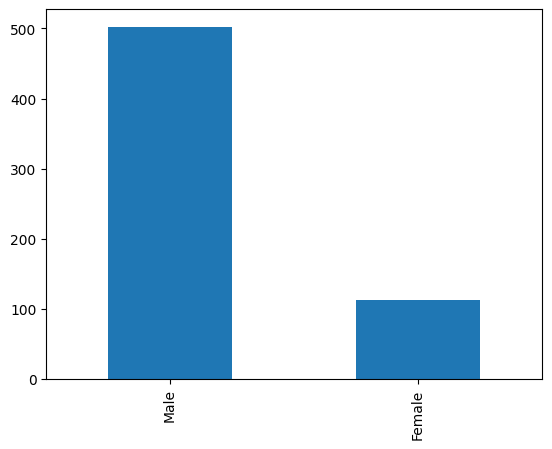

In [55]:
#EDA
#Categorical attribute visualization
data['Gender'].value_counts().plot(kind='bar')

<Axes: >

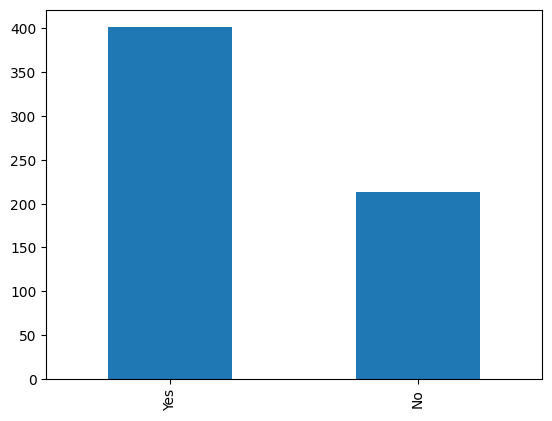

In [56]:
data['Married'].value_counts().plot(kind='bar')

<Axes: >

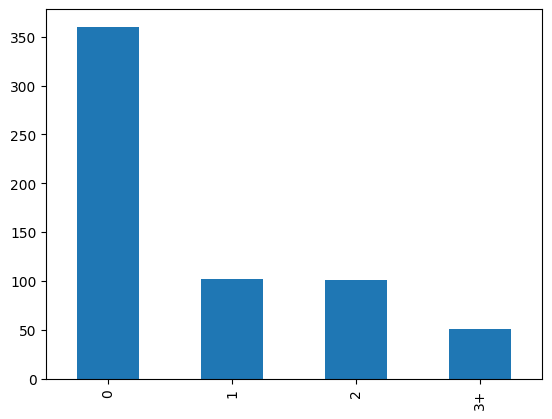

In [57]:
data['Dependents'].value_counts().plot(kind='bar')

<Axes: >

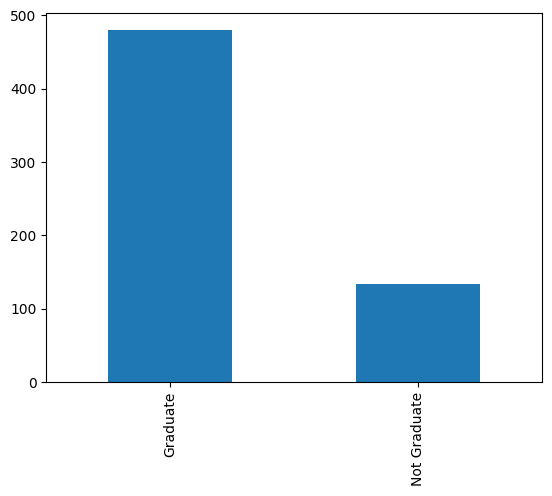

In [58]:
data['Education'].value_counts().plot(kind='bar')

<Axes: >

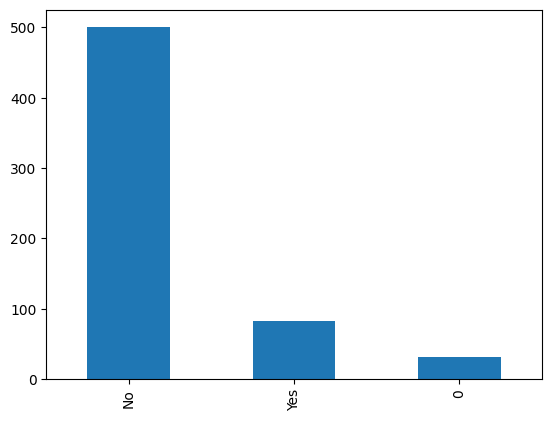

In [59]:
data['Self_Employed'].value_counts().plot(kind='bar')

<Axes: >

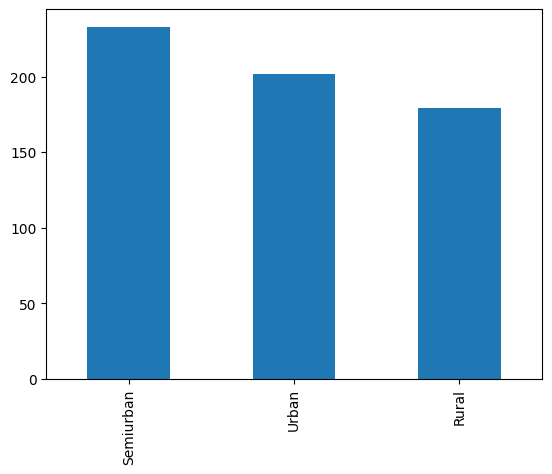

In [60]:
data['Property_Area'].value_counts().plot(kind='bar')

<Axes: >

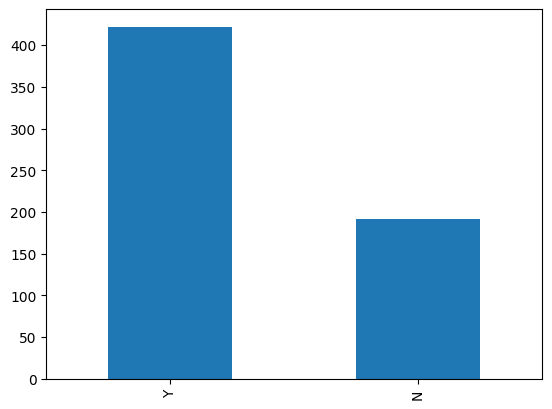

In [61]:
data['Loan_Status'].value_counts().plot(kind='bar')

<ipython-input-62-68862390cfa9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

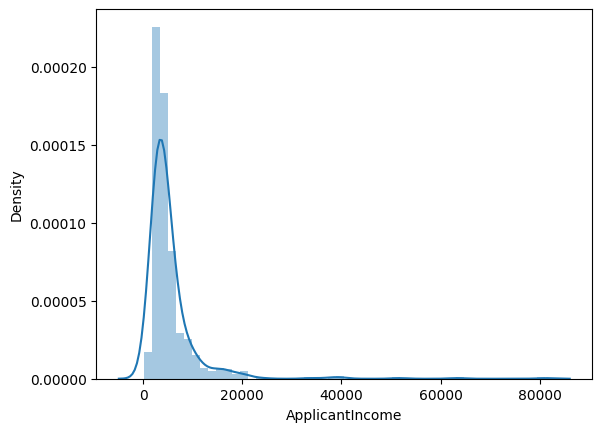

In [62]:
#neumerical atributes visualization #Histogram
sns.distplot(data['ApplicantIncome'])

In [63]:
#Apply log trasformation to the attribute
data['ApplicantIncome']=np.log(data['ApplicantIncome'])

<ipython-input-64-4e3759c2ed42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

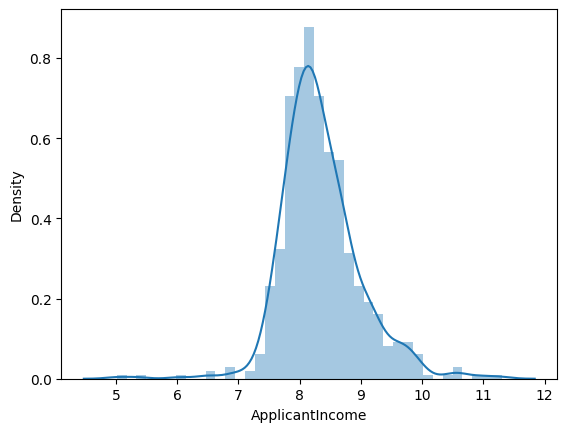

In [64]:
sns.distplot(data['ApplicantIncome'])

<ipython-input-65-dbf074d7f8ef>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

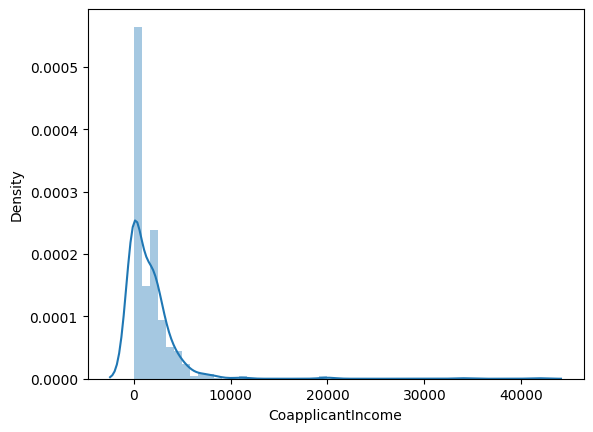

In [65]:
sns.distplot(data['CoapplicantIncome'])

In [66]:
data['CoapplicantIncome']=np.log(data['CoapplicantIncome'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-67-36613f125fe8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

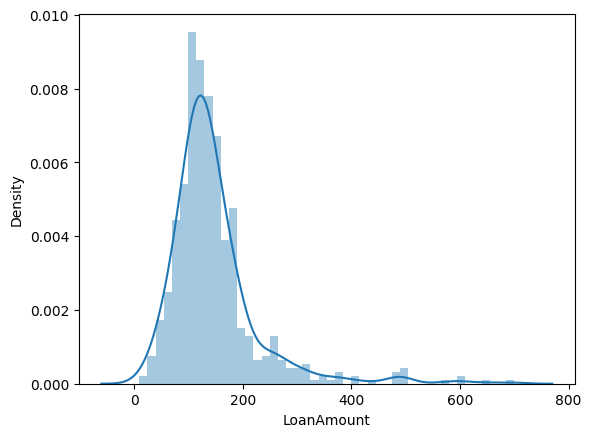

In [67]:
sns.distplot(data['LoanAmount'])

In [68]:
data['LoanAmount']=np.log(data['LoanAmount'])

<ipython-input-69-36613f125fe8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

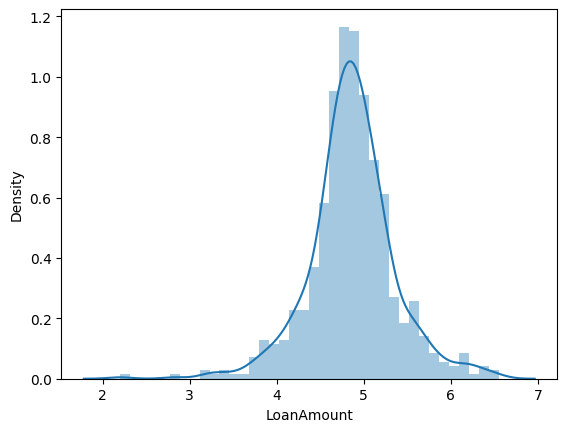

In [69]:
sns.distplot(data['LoanAmount'])

<ipython-input-70-ead2520e5ebb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

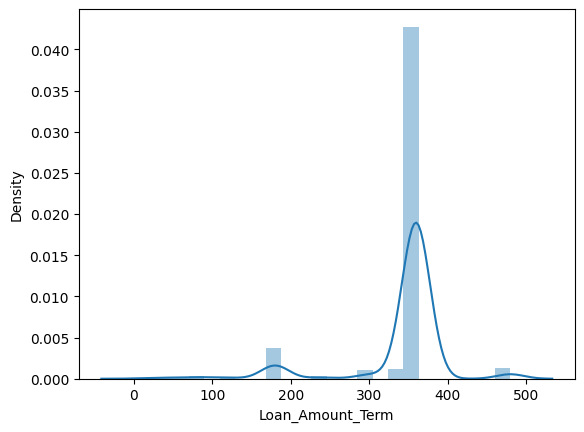

In [70]:
sns.distplot(data['Loan_Amount_Term'])

In [71]:
data['Loan_Amount_Term']=np.log(data['Loan_Amount_Term'])

<ipython-input-72-ead2520e5ebb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

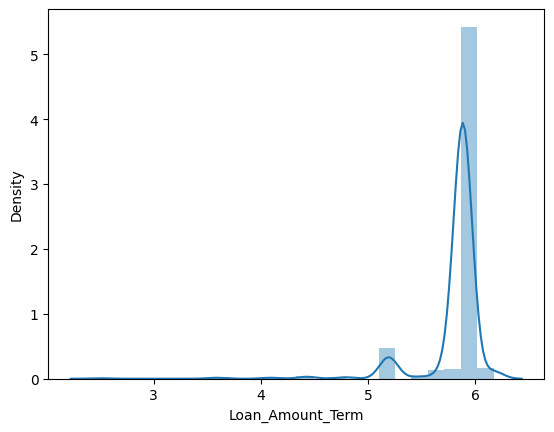

In [72]:
sns.distplot(data['Loan_Amount_Term'])

<ipython-input-73-a6a01f5c828d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


<Axes: xlabel='Credit_History', ylabel='Density'>

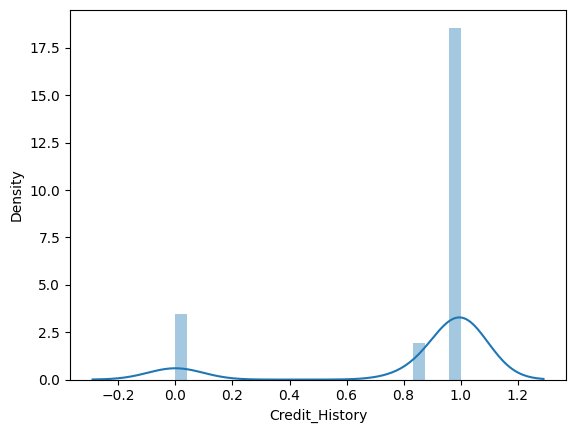

In [73]:
sns.distplot(data['Credit_History'])

In [80]:
#creation of new atributes
#Total income
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y,2.160333,NaN,1.606719,1.772594,-inf
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N,2.131810,1.990411,1.579397,1.772594,15.748649
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y,2.080237,NaN,1.432618,1.772594,-inf
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y,2.061368,2.049700,1.566007,1.772594,15.622276
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y,2.163267,NaN,1.599137,1.772594,-inf


<ipython-input-74-5cccd387dd81>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncomeLog'])


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

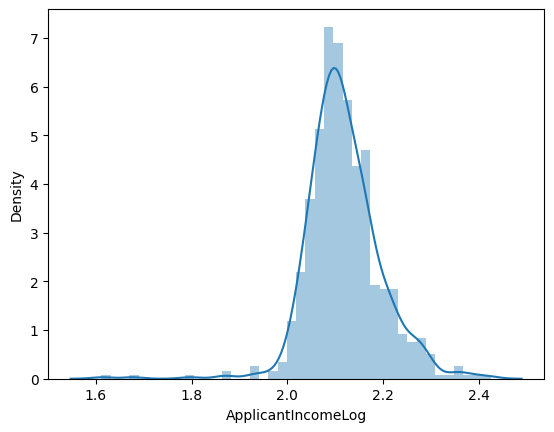

In [74]:
#Apply log transformation to the attributes
#Log transformation
data['ApplicantIncomeLog']=np.log(data['ApplicantIncome'])
sns.distplot(data['ApplicantIncomeLog'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-75-73479fa13a8a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncomeLog'])


<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

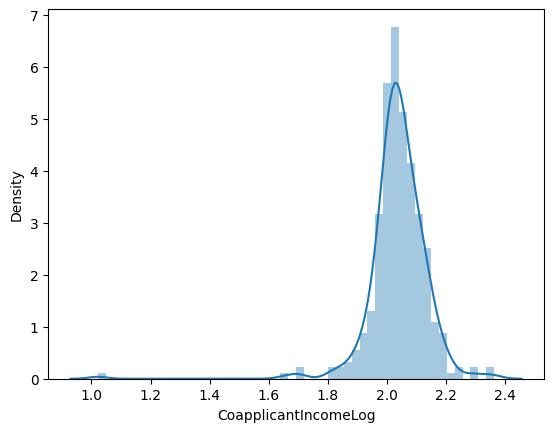

In [75]:
data['CoapplicantIncomeLog']=np.log(data['CoapplicantIncome'])
sns.distplot(data['CoapplicantIncomeLog'])

<ipython-input-76-d8398dd2068e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LoanAmountLog'])


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

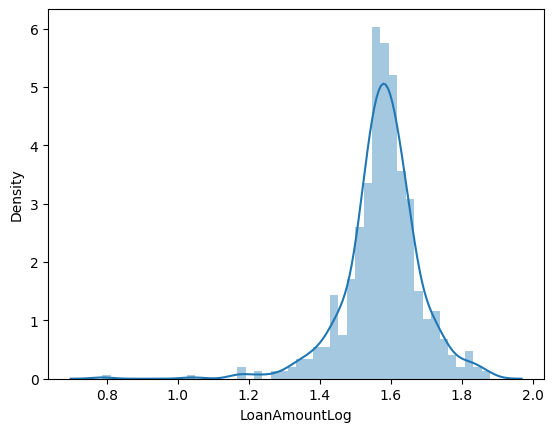

In [76]:
data['LoanAmountLog']=np.log(data['LoanAmount'])
sns.distplot(data['LoanAmountLog'])

<ipython-input-77-0bf06fb635b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Loan_Amount_TermLog'])


<Axes: xlabel='Loan_Amount_TermLog', ylabel='Density'>

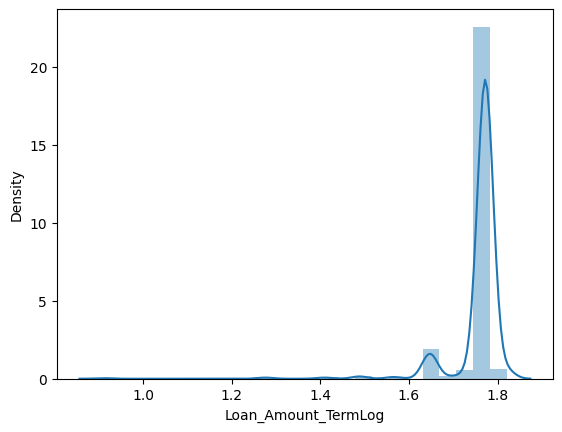

In [77]:
data['Loan_Amount_TermLog']=np.log(data['Loan_Amount_Term'])
sns.distplot(data['Loan_Amount_TermLog'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-81-cd99c184e90d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Total_IncomeLog'])


<Axes: xlabel='Total_IncomeLog', ylabel='Density'>

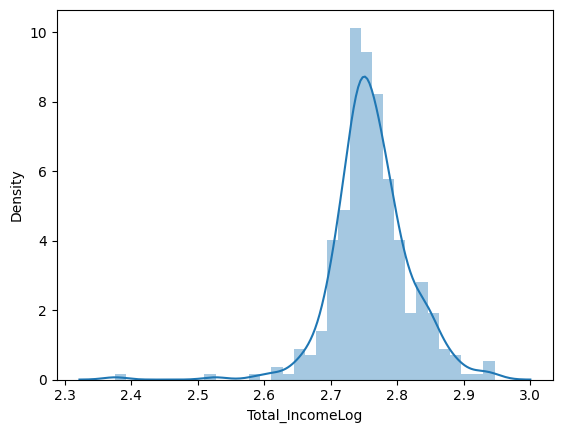

In [81]:
data['Total_IncomeLog']=np.log(data['Total_Income'])
sns.distplot(data['Total_IncomeLog'])

<ipython-input-82-e799ba0b4020>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

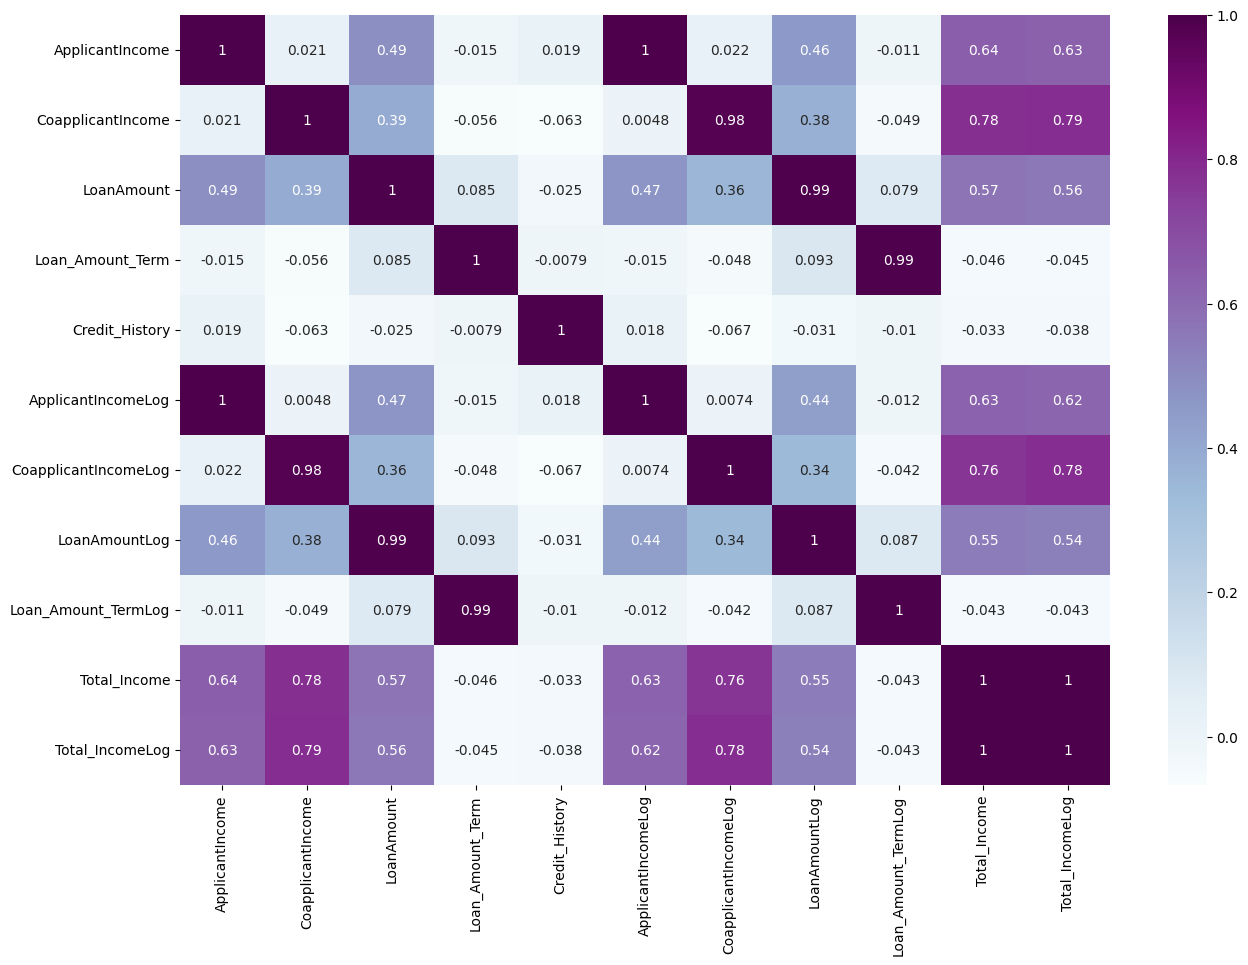

In [82]:
#correlation matrix
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")


In [39]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,LP001002,Male,No,0,Graduate,No,8.674026,-inf,4.986426,5.886104,1.0,Urban,Y,-inf,2.160333,NaN,1.606719,1.772594,NaN
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,5.886104,1.0,Rural,N,15.748649,2.131810,1.990411,1.579397,1.772594,2.756755
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,-inf,4.189655,5.886104,1.0,Urban,Y,-inf,2.080237,NaN,1.432618,1.772594,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,5.886104,1.0,Urban,Y,15.622276,2.061368,2.049700,1.566007,1.772594,2.748698
4,LP001008,Male,No,0,Graduate,No,8.699515,-inf,4.948760,5.886104,1.0,Urban,Y,-inf,2.163267,NaN,1.599137,1.772594,NaN


In [83]:
#drop unnecesary columns
colls=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog','Total_IncomeLog']
data.drop(columns=colls, axis=True , inplace=True)
data.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,1.606719,1.772594
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810,1.579397,1.772594
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,1.432618,1.772594
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368,1.566007,1.772594
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,1.599137,1.772594


In [93]:
#Label Encoding (categorical columns to neumerical columns)
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
  data[col]=le.fit_transform(data[col])


In [94]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,1,0,0,0,1,1.0,2,1,2.160333,1.606719,1.772594
1,1,1,1,0,1,1.0,0,0,2.131810,1.579397,1.772594
2,1,1,0,0,2,1.0,2,1,2.080237,1.432618,1.772594
3,1,1,0,1,1,1.0,2,1,2.061368,1.566007,1.772594
4,1,0,0,0,1,1.0,2,1,2.163267,1.599137,1.772594


In [95]:
#Train-Test split
#spacify input and output attributes
x=data.drop(columns=['Loan_Status'],axis=1)
y=data['Loan_Status']

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [103]:
#Model Training
#classify function
from sklearn.model_selection import cross_val_score
def classify(model,x ,y):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
  model.fit(x_train,y_train)
  print("Accuracyis", model.score(x_test,y_test)*100)
  #cross validation(it is used for better validation of model)
  score=cross_val_score(model,x,y, cv=5)
  print("cross validation is",np.mean(score)*100)


In [116]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
classify(model, x, y)

Accuracyis 77.27272727272727
cross validation is 80.9462881514061


In [117]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,x,y)

Accuracyis 72.72727272727273
cross validation is 70.687724910036


In [118]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,x,y)

Accuracyis 79.22077922077922
cross validation is 77.52632280421166


In [119]:
#Hyperparameter tuuning
model=RandomForestClassifier(n_estimators=100,min_samples_split=50,max_depth=10,max_features=1)
classify(model,x,y)

Accuracyis 77.92207792207793
cross validation is 80.62108489937359


In [120]:
#Confusion Martix
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [121]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[25, 29],
       [ 4, 96]])

<Axes: >

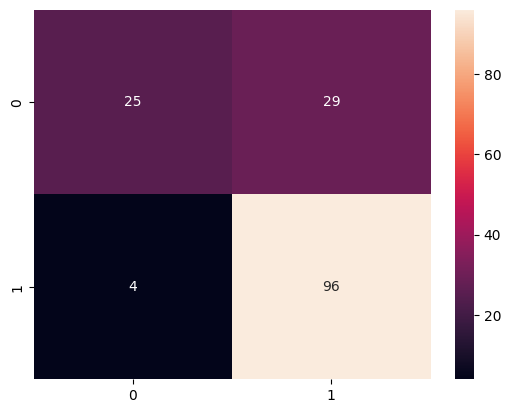

In [122]:
sns.heatmap(cm,annot=True)